In [46]:
import pandas as pd
import numpy as np
import featuretools as ft
from featuretools.primitives import TransformPrimitive

# Create random car data
np.random.seed(42)  # for reproducibility

n_samples = 100

# Generate random data
car_data = {
    'car_id': range(1, n_samples + 1),
    'price': np.random.uniform(10000, 100000, n_samples),  # Random prices between 10k and 100k
    'mileage': np.random.uniform(0, 150000, n_samples),    # Random mileage between 0 and 150k
    'year': np.random.randint(2010, 2024, n_samples),      # Random years between 2010 and 2023
    'engine_size': np.random.uniform(1.0, 5.0, n_samples), # Random engine sizes between 1.0L and 5.0L
    'horsepower': np.random.randint(100, 500, n_samples),  # Random horsepower between 100 and 500
    'fuel_efficiency': np.random.uniform(15, 40, n_samples) # Random MPG between 15 and 40
}

cars_df = pd.DataFrame(car_data)

# Create an EntitySet
es = ft.EntitySet(id="car_data")

# Add the dataframe as an entity
es.add_dataframe(
    dataframe_name="cars",
    dataframe=cars_df,
    index="car_id"
)


# Create feature definitions
feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="cars",
    trans_primitives=[
        "add_numeric",
        "multiply_numeric",
        "divide_numeric",
        "subtract_numeric",
        "percentile",
        "ModuloByFeature",
   
    ],
    # agg_primitives=[],  # No aggregation needed for single table
    max_depth=4  # Limit the depth of feature generation
)

# Display the first few rows and features
print("Number of features created:", len(feature_defs))
print("\nFirst few rows of the feature matrix:")
print(feature_matrix.head())

# Display some example features
print("\nExample feature definitions:")
for feat in feature_defs[:10]:
    print(feat)

feature_matrix

Number of features created: 93

First few rows of the feature matrix:
               price        mileage  year  engine_size  horsepower  \
car_id                                                               
1       43708.610696    4714.377853  2017     1.388706         251   
2       95564.287577   95461.561690  2013     3.460029         495   
3       75879.454763   47153.397161  2020     4.960215         277   
4       63879.263578   76285.603675  2010     1.560336         262   
5       24041.677640  136134.971089  2017     3.073319         479   

        fuel_efficiency  engine_size + fuel_efficiency  \
car_id                                                   
1             38.273228                      39.661934   
2             39.356205                      42.816234   
3             39.898281                      44.858496   
4             16.396779                      17.957115   
5             33.425889                      36.499208   

        engine_size + horsepower

/home/kin/Project/stat/stat/lib/python3.12/site-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


,price,mileage,year,engine_size,horsepower,fuel_efficiency,engine_size + fuel_efficiency,engine_size + horsepower,engine_size + mileage,engine_size + price,...,fuel_efficiency - horsepower,fuel_efficiency - mileage,fuel_efficiency - price,fuel_efficiency - year,horsepower - mileage,horsepower - price,horsepower - year,mileage - price,mileage - year,price - year
car_id,,,,,,,,,,,,,,,,,,,,,
1,43708.610696,4714.377853,2017,1.388706,251,38.273228,39.661934,252.388706,4715.766559,43709.999402,...,-212.726772,-4676.104625,-43670.337469,-1978.726772,-4463.377853,-43457.610696,-1766.0,-38994.232843,2697.377853,41691.610696
2,95564.287577,95461.561690,2013,3.460029,495,39.356205,42.816234,498.460029,95465.021718,95567.747606,...,-455.643795,-95422.205484,-95524.931372,-1973.643795,-94966.561690,-95069.287577,-1518.0,-102.725887,93448.561690,93551.287577
3,75879.454763,47153.397161,2020,4.960215,277,39.898281,44.858496,281.960215,47158.357377,75884.414978,...,-237.101719,-47113.498880,-75839.556482,-1980.101719,-46876.397161,-75602.454763,-1743.0,-28726.057602,45133.397161,73859.454763
4,63879.263578,76285.603675,2010,1.560336,262,16.396779,17.957115,263.560336,76287.164011,63880.823914,...,-245.603221,-76269.206896,-63862.866799,-1993.603221,-76023.603675,-63617.263578,-1748.0,12406.340097,74275.603675,61869.263578
5,24041.677640,136134.971089,2017,3.073319,479,33.425889,36.499208,482.073319,136138.044408,24044.750958,...,-445.574111,-136101.545200,-24008.251751,-1983.574111,-135655.971089,-23562.677640,-1538.0,112093.293449,134117.971089,22024.677640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,54441.603673,52381.436192,2015,1.282275,250,27.009252,28.291527,251.282275,52382.718467,54442.885948,...,-222.990748,-52354.426940,-54414.594421,-1987.990748,-52131.436192,-54191.603673,-1765.0,-2060.167481,50366.436192,52426.603673
97,57045.954644,108893.351831,2019,3.569677,243,39.632151,43.201828,246.569677,108896.921508,57049.524321,...,-203.367849,-108853.719679,-57006.322493,-1979.367849,-108650.351831,-56802.954644,-1776.0,51847.397186,106874.351831,55026.954644
98,48478.691652,134566.538993,2012,1.106045,156,24.418474,25.524519,157.106045,134567.645038,48479.797698,...,-131.581526,-134542.120519,-48454.273178,-1987.581526,-134410.538993,-48322.691652,-1856.0,86087.847341,132554.538993,46466.691652


In [42]:
print("\nExample feature definitions:")
print(feature_defs)


Example feature definitions:
[<Feature: price>, <Feature: mileage>, <Feature: year>, <Feature: engine_size>, <Feature: horsepower>, <Feature: fuel_efficiency>, <Feature: engine_size + fuel_efficiency>, <Feature: engine_size + horsepower>, <Feature: engine_size + mileage>, <Feature: engine_size + price>, <Feature: engine_size + year>, <Feature: fuel_efficiency + horsepower>, <Feature: fuel_efficiency + mileage>, <Feature: fuel_efficiency + price>, <Feature: fuel_efficiency + year>, <Feature: horsepower + mileage>, <Feature: horsepower + price>, <Feature: horsepower + year>, <Feature: mileage + price>, <Feature: mileage + year>, <Feature: price + year>]


In [34]:
feature = feature_defs[25]
feature

<Feature: engine_size / year>

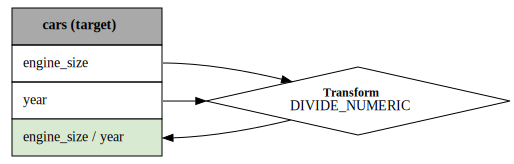

In [35]:
ft.graph_feature(feature)

In [11]:
ft.primitives.list_primitives()[0:10]

,name,type,description,valid_inputs,return_type
0,entropy,aggregation,Calculates the entropy for a categorical column,<ColumnSchema (Semantic Tags = ['category'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
1,count_below_mean,aggregation,Determines the number of values that are below...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = IntegerNullable)...
2,first_last_time_delta,aggregation,Determines the time between the first and last...,<ColumnSchema (Logical Type = Datetime) (Seman...,<ColumnSchema (Logical Type = Double) (Semanti...
3,max_count,aggregation,Calculates the number of occurrences of the ma...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
4,num_false_since_last_true,aggregation,Calculates the number of 'False' values since ...,<ColumnSchema (Logical Type = Boolean)>,<ColumnSchema (Logical Type = IntegerNullable)...
5,min,aggregation,"Calculates the smallest value, ignoring `NaN` ...",<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Semantic Tags = ['numeric'])>
6,n_unique_weeks,aggregation,Determines the number of unique weeks.,<ColumnSchema (Logical Type = Datetime)>,<ColumnSchema (Logical Type = Integer) (Semant...
7,percent_true,aggregation,Determines the percent of `True` values.,"<ColumnSchema (Logical Type = Boolean)>, <Colu...",<ColumnSchema (Logical Type = Double) (Semanti...
8,count_inside_nth_std,aggregation,Determines the count of observations that lie ...,<ColumnSchema (Semantic Tags = ['numeric'])>,<ColumnSchema (Logical Type = Integer) (Semant...
9,n_unique_days,aggregation,Determines the number of unique days.,<ColumnSchema (Logical Type = Datetime)>,<ColumnSchema (Logical Type = Integer) (Semant...
